<a href="https://colab.research.google.com/github/cfreeman22/CreditCardChurnPrediction/blob/main/CreditCardUsersChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card churn Prediction
Which customer is most likely to churn?
Presented By Christian Freeman  March 2022

## Project Planning
## PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

 
## Background & Context

The Thera bank recently saw a steep decline in the number of credit card users. Credit cards are a good source of income for banks because of the different kinds of fees the banks charge, such as annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers leaving credit cards services would lead banks to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.
Goals and objectives
Understanding consumer behavior can be quite challenging, especially when the product we offer our customers is a service rather than a tangible physical product.
My goal in this project is to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cardsIn the case of predicting which customer is most likely to churn, I will perform the following:

- Prepare the data for visualization using a customized module wrangle.py
- Identify patterns and insights
- Document key observations and relationships between variable

- Identify the characteristics of customers who are more likely to churn and the potential reasons for this behavior.
- Build a ML model to predict which customers may stop using credit cards so that recommendations are made based on the findings to help increase the chances of targeting the right customer.
- I will be using Python, Pandas, Matplotlib, Seaborn, and Scikit-Learn libraries to analyze and create a ML classification model.

## Initial Questions
- What are the unique characteristics of our customers?
- What factors increase their chances of churning?
- can we predict credit cards subscribers' behavior?

## Executive Summary
Findings Include:
- turned adaboost on under sampled data was the best model with a recall score of 87 % of the testing set

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np
import wrangle
# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

 

## Acquire the Data

In [2]:
raw = pd.read_csv("BankChurners.csv")

In [3]:
# Checking the number of rows and columns in the data
raw.shape

(10127, 21)

In [4]:
# let's create a copy of the data
df = raw.copy()

In [5]:
# let's view the first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [9]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [10]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [11]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [12]:
# Checking for nulls
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [13]:
# Descriptives Statistics
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


In [14]:
# Value counts of all variables
for column in df.columns.to_list():
    print(df[column].value_counts())
    print('===================================')
    print()

768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

F    5358
M    4769
Name: Gender, dtype: int64

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

Graduate         3128
High School      2013
Uneducated       1487
Colleg

### Observations
- The data f has 21 columns and 10127 recors
- no duplicated values
- 15% of Educational level  and 7.4% of marital status are missing
- the mean age is 46 years old 
-The average credit limit is is 8631 with a miximum of 34516 possibly skwed to the left with outliers. Same with total transaction amount
- the majory of customers have not churned
- the eductional level for most is graduate
- the highest income category is less than 40k
- the most used card is the Blue card
- majority of customers are married
- Most customers are females 

## Data Preparation

#### data preprocessing

- Dropping the ID CLIENTNUM column
- To avoid data leakage i will split the data in train , validate and test 
- Perform exporation on training test 
- Perform feature engineering on each set seperately
- Replace Attrition flag with 0 for existing customers and 1 for attritted customers
- Replace the abc category in the icome category with the mode

In [15]:
df['Income_Category'].loc[df['Income_Category'] == 'abc']= pd.Series(df['Income_Category'].loc[df['Income_Category'] == 'abc']).str.replace('abc', df['Income_Category'].mode()[0], regex=True)


In [16]:
df['Attrition_Flag'] = df['Attrition_Flag'].map(
                   {'Existing Customer':0 ,'Attrited Customer':1}).astype('int')

In [17]:
cat_var = ['Attrition_Flag', 'Education_Level', 'Card_Category', 'Total_Relationship_Count', 'Marital_Status', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
          'Gender','Income_Category','Dependent_count']
cat_var2 = ['Education_Level', 'Card_Category', 'Total_Relationship_Count', 'Marital_Status', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
          'Gender','Income_Category','Dependent_count']
target = 'Attrition_Flag'
quant_var = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
 

In [18]:
cor_matrix = df.corr().abs()

In [19]:
# Finding highly correlated columns to drop 
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                          CLIENTNUM  Attrition_Flag  Customer_Age  \
CLIENTNUM                       NaN           0.046         0.008   
Attrition_Flag                  NaN             NaN         0.018   
Customer_Age                    NaN             NaN           NaN   
Dependent_count                 NaN             NaN           NaN   
Months_on_book                  NaN             NaN           NaN   
Total_Relationship_Count        NaN             NaN           NaN   
Months_Inactive_12_mon          NaN             NaN           NaN   
Contacts_Count_12_mon           NaN             NaN           NaN   
Credit_Limit                    NaN             NaN           NaN   
Total_Revolving_Bal             NaN             NaN           NaN   
Avg_Open_To_Buy                 NaN             NaN           NaN   
Total_Amt_Chng_Q4_Q1            NaN             NaN           NaN   
Total_Trans_Amt                 NaN             NaN           NaN   
Total_Trans_Ct                  Na

In [20]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['Avg_Open_To_Buy']


- I will drop the client number because each is unique
- I will drop the open_average to buy as well because it does ot add any new information

In [21]:
# enrollee_id is unique for each candidate and might not add value to modeling
df.drop(["CLIENTNUM","Avg_Open_To_Buy"], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

#### Splitting the data into train, test validate

In [23]:
train, validate, test = wrangle.train_validate_test_split(df, target, seed= 123)

train:    (5670, 19)
validate: (2431, 19)
test:     (2026, 19)


## Exploratory Data Analysis

### Univariate Analysis Numeric Columns

In [24]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status"]

# fit and transform the imputer on train data
train[cols_to_impute] = imp_mode.fit_transform(train[cols_to_impute])

# Transform on validation and test data
validate[cols_to_impute] = imp_mode.transform(validate[cols_to_impute])

# fit and transform the imputer on test data
test[cols_to_impute] = imp_mode.transform(test[cols_to_impute])

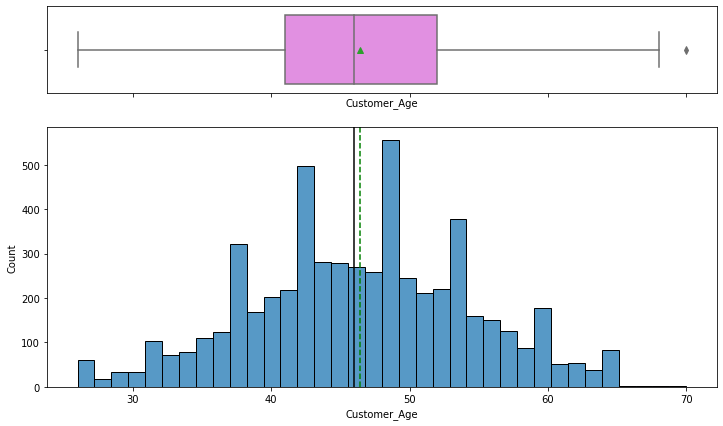

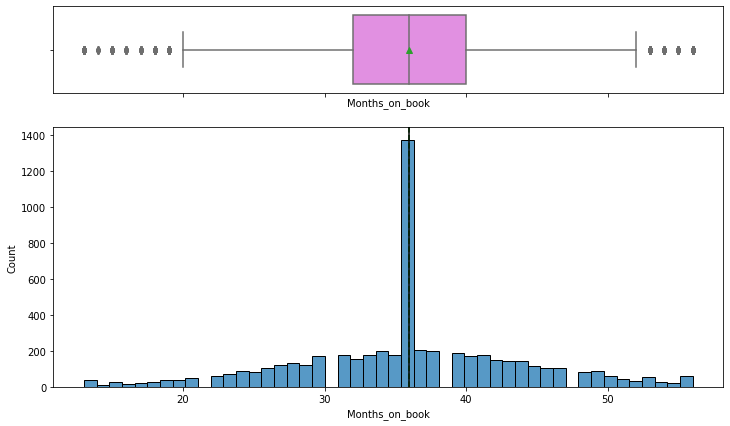

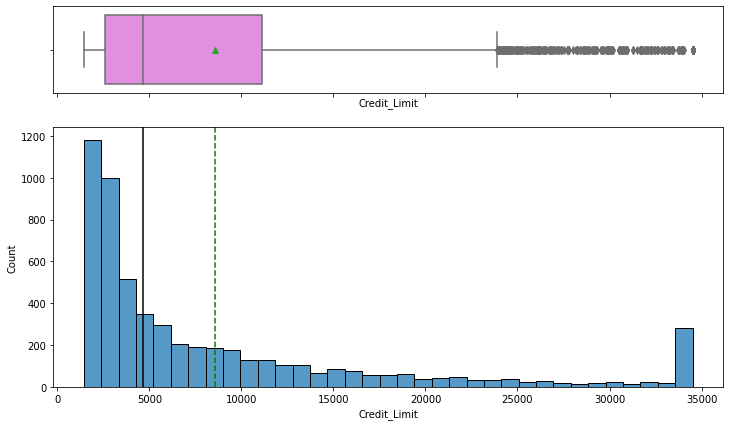

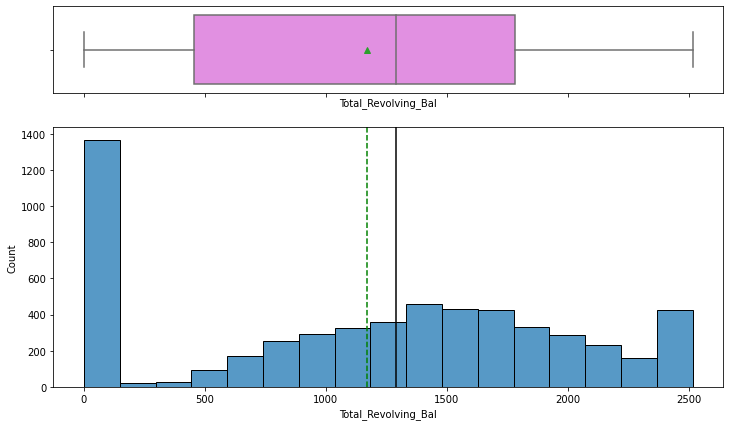

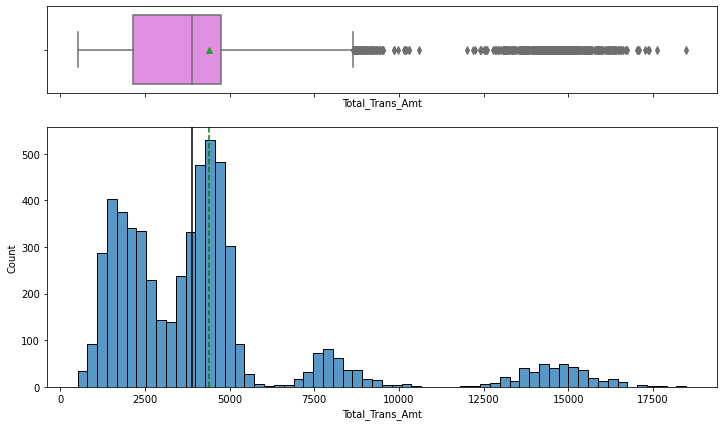

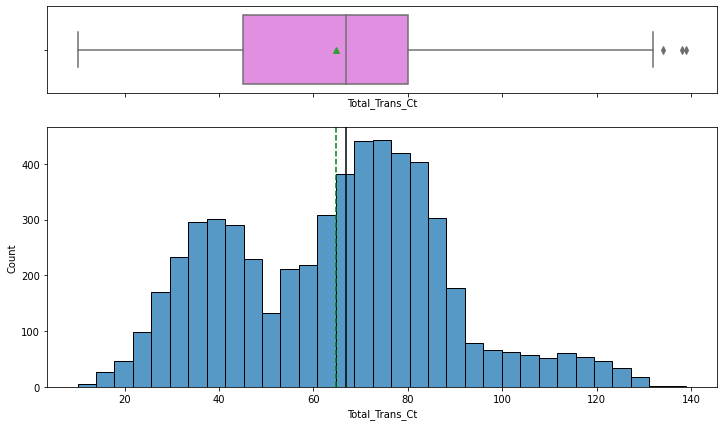

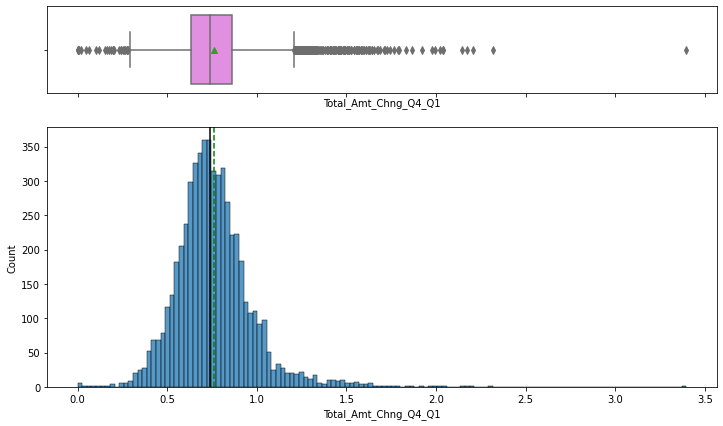

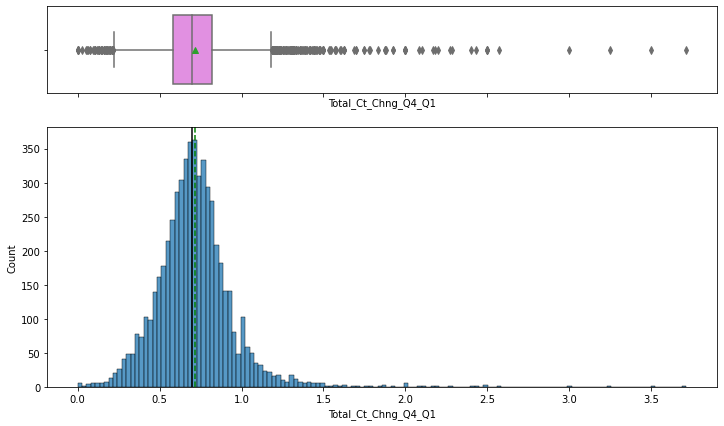

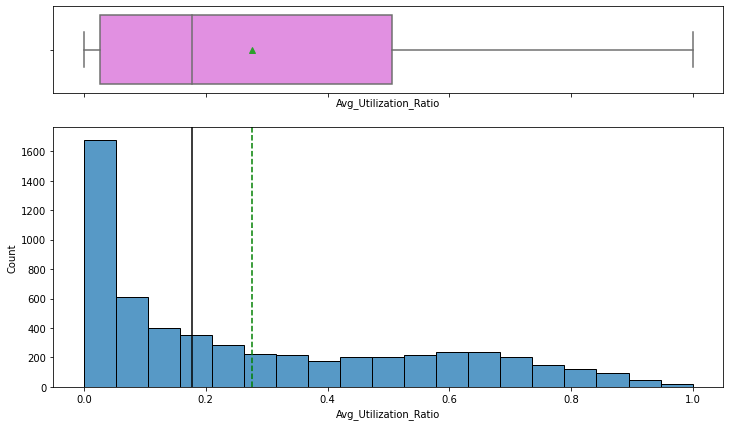

In [25]:
for x in quant_var:
    wrangle.histogram_boxplot(train, x) #Analysing numeric variables using our predefined module stored in the wrangle file 

##### Takeaway For univariate numeric columns
-  Credit_Limit, Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1, and Total_Trans_Amt have outliers
- customers age seem normally distributed
-  Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1 seem to have a bell shaper curve but with many outliers on the upper range

### Univariate Analysis categorical Columns

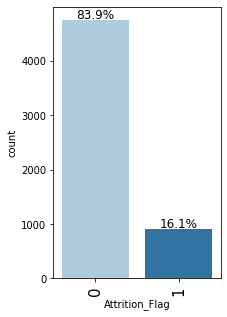

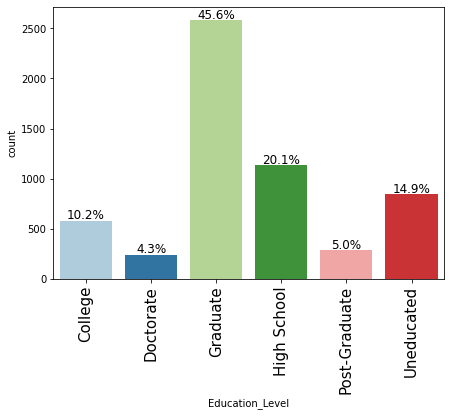

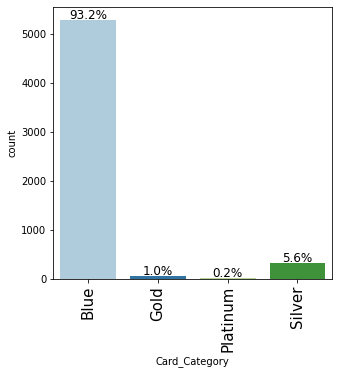

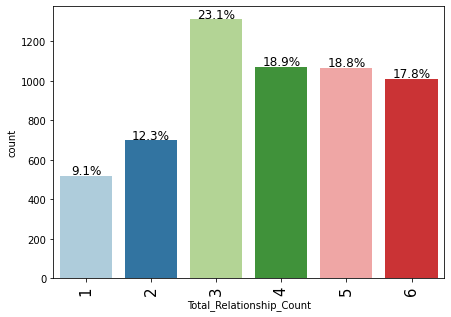

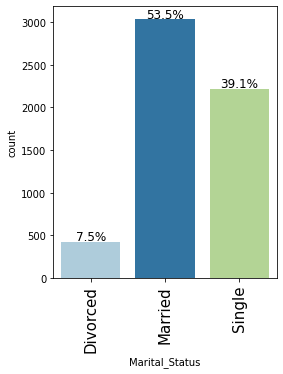

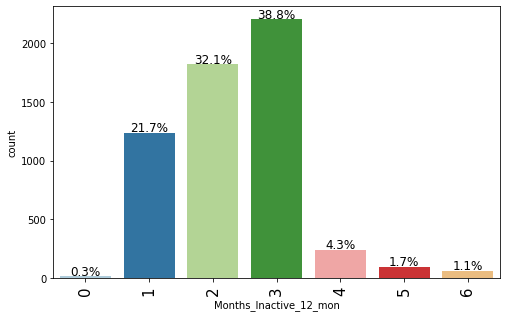

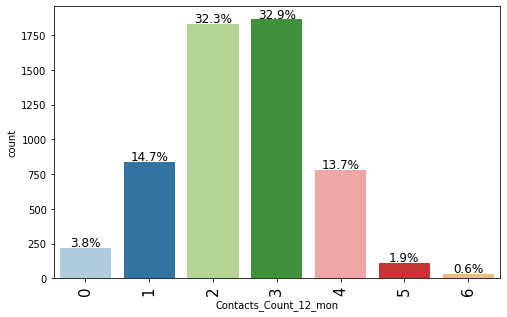

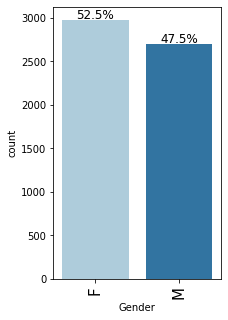

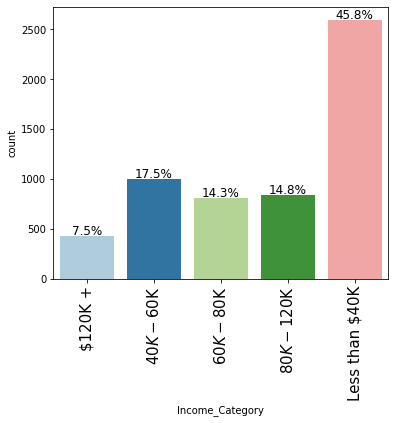

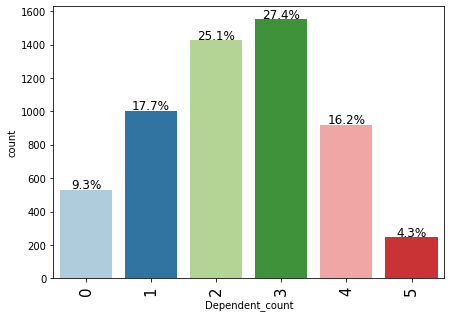

In [27]:
for x in cat_var:
    wrangle.labeled_barplot(train, x, perc=True) #Analysing categorical variables using our predefined module stored in the wrangle file

#### Takeaway For univariate categorical columns
- Existing customers represent 84% of the data while chuners represent 16%
- graduates represent 45% of the data, PHD holders have the miniority
- Blue card holders represent 93 % of the data while platinum is less than 1%
- The majority of the customers have 3 to 6 relationship with the bank 
- More than half the customers are married and 40 % single
- Most customers are inactve between 11 to 3 months
- most customers have between and 4 dependents  

### Bivariate Analysis

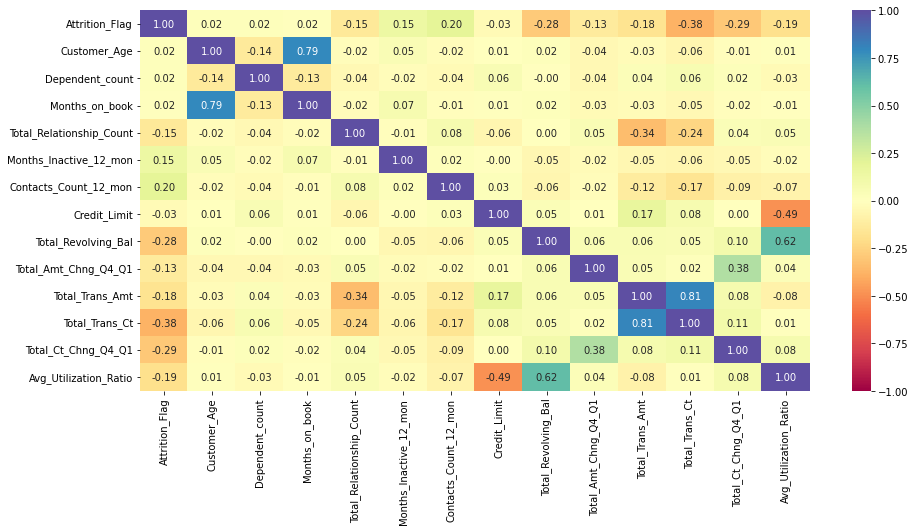

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [29]:
train.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Education_Level 
_____________________

   chi2  p-value  degrees of freedom
0 5.131    0.400                   5

observed:
 Attrition_Flag      0    1   All
Education_Level                 
College           490   89   579
Doctorate         193   49   242
Graduate         2175  409  2584
High School       962  175  1137
Post-Graduate     233   53   286
Uneducated        706  136   842
All              4759  911  5670

expected:
          0       1
0  485.972  93.028
1  203.118  38.882
2 2168.828 415.172
3  954.318 182.682
4  240.048  45.952
5  706.716 135.284


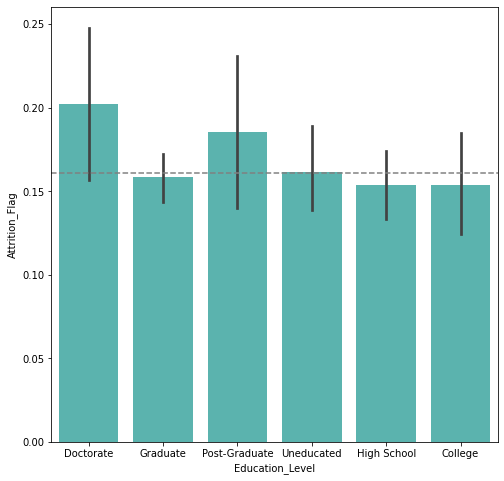


_____________________

Card_Category 
_____________________

   chi2  p-value  degrees of freedom
0 2.983    0.394                   3

observed:
 Attrition_Flag     0    1   All
Card_Category                  
Blue            4427  859  5286
Gold              53    6    59
Platinum           7    2     9
Silver           272   44   316
All             4759  911  5670

expected:
          0       1
0 4436.697 849.303
1   49.520   9.480
2    7.554   1.446
3  265.228  50.772


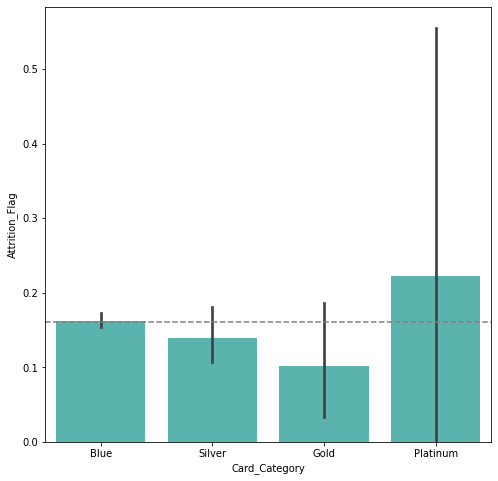


_____________________

Total_Relationship_Count 
_____________________

     chi2  p-value  degrees of freedom
0 156.904    0.000                   5

observed:
 Attrition_Flag               0    1   All
Total_Relationship_Count                 
1                          383  135   518
2                          506  192   698
3                         1088  223  1311
4                          947  122  1069
5                          933  131  1064
6                          902  108  1010
All                       4759  911  5670

expected:
          0       1
0  434.773  83.227
1  585.852 112.148
2 1100.361 210.639
3  897.244 171.756
4  893.047 170.953
5  847.723 162.277


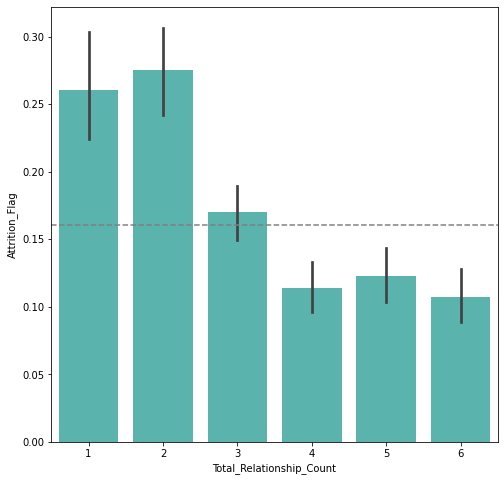


_____________________

Marital_Status 
_____________________

   chi2  p-value  degrees of freedom
0 1.814    0.404                   2

observed:
 Attrition_Flag     0    1   All
Marital_Status                 
Divorced         358   65   423
Married         2560  472  3032
Single          1841  374  2215
All             4759  911  5670

expected:
          0       1
0  355.037  67.963
1 2544.848 487.152
2 1859.116 355.884


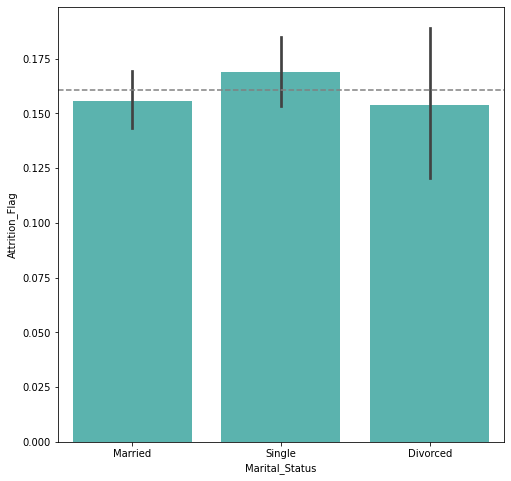


_____________________

Months_Inactive_12_mon 
_____________________

     chi2  p-value  degrees of freedom
0 210.662    0.000                   6

observed:
 Attrition_Flag             0    1   All
Months_Inactive_12_mon                 
0                         10    7    17
1                       1176   57  1233
2                       1535  284  1819
3                       1736  465  2201
4                        166   75   241
5                         82   13    95
6                         54   10    64
All                     4759  911  5670

expected:
          0       1
0   14.269   2.731
1 1034.894 198.106
2 1526.741 292.259
3 1847.365 353.635
4  202.278  38.722
5   79.736  15.264
6   53.717  10.283


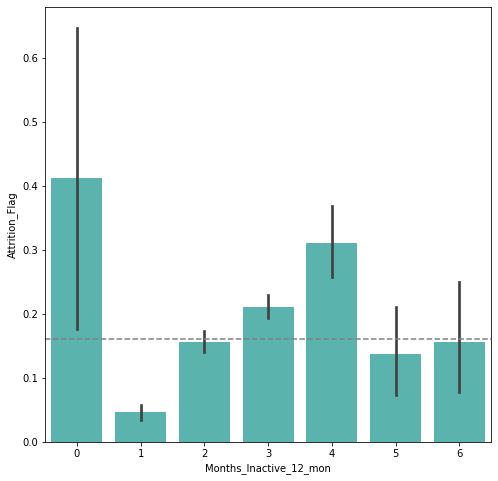


_____________________

Contacts_Count_12_mon 
_____________________

     chi2  p-value  degrees of freedom
0 332.583    0.000                   6

observed:
 Attrition_Flag            0    1   All
Contacts_Count_12_mon                 
0                       212    6   218
1                       776   60   836
2                      1596  235  1831
3                      1500  364  1864
4                       601  177   778
5                        74   35   109
6                         0   34    34
All                    4759  911  5670

expected:
          0       1
0  182.974  35.026
1  701.680 134.320
2 1536.813 294.187
3 1564.511 299.489
4  652.999 125.001
5   91.487  17.513
6   28.537   5.463


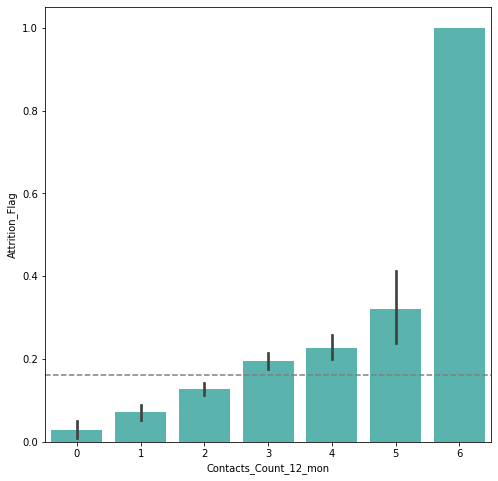


_____________________

Gender 
_____________________

    chi2  p-value  degrees of freedom
0 11.264    0.001                   1

observed:
 Attrition_Flag     0    1   All
Gender                         
F               2451  525  2976
M               2308  386  2694
All             4759  911  5670

expected:
          0       1
0 2497.846 478.154
1 2261.154 432.846


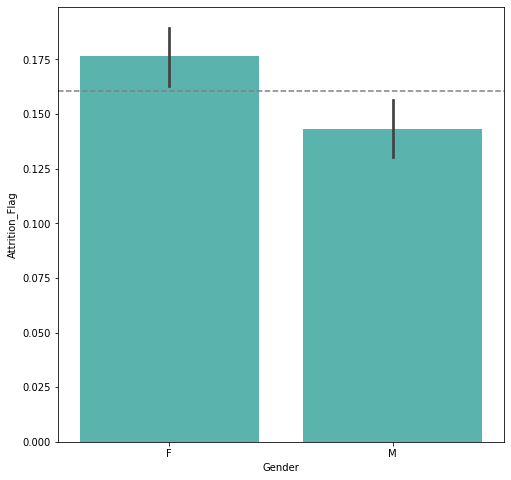


_____________________

Income_Category 
_____________________

   chi2  p-value  degrees of freedom
0 7.621    0.106                   4

observed:
 Attrition_Flag      0    1   All
Income_Category                 
$120K +           359   68   427
$40K - $60K       840  155   995
$60K - $80K       698  114   812
$80K - $120K      718  122   840
Less than $40K   2144  452  2596
All              4759  911  5670

expected:
          0       1
0  358.394  68.606
1  835.133 159.867
2  681.536 130.464
3  705.037 134.963
4 2178.900 417.100


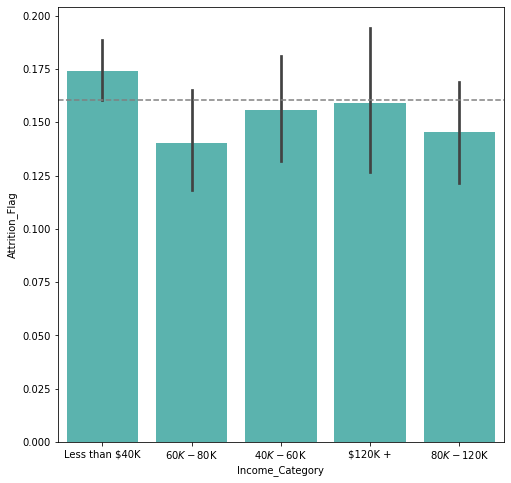


_____________________

Dependent_count 
_____________________

   chi2  p-value  degrees of freedom
0 6.136    0.293                   5

observed:
 Attrition_Flag      0    1   All
Dependent_count                 
0                 445   84   529
1                 859  144  1003
2                1205  220  1425
3                1275  276  1551
4                 771  146   917
5                 204   41   245
All              4759  911  5670

expected:
          0       1
0  444.005  84.995
1  841.848 161.152
2 1196.045 228.955
3 1301.801 249.199
4  769.665 147.335
5  205.636  39.364


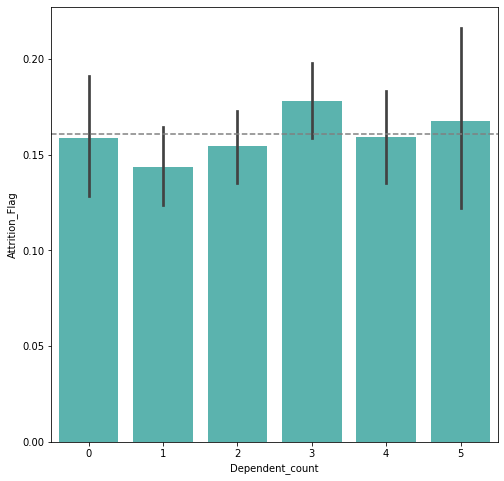


_____________________

Customer_Age 
____________________



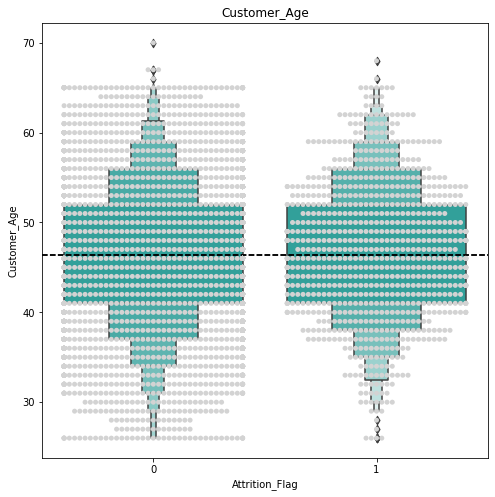

                  count   mean   std    min    25%    50%    75%    max
Attrition_Flag                                                         
0              4759.000 46.341 8.100 26.000 41.000 46.000 52.000 70.000
1               911.000 46.797 7.734 26.000 41.000 46.000 52.000 68.000 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2112233.0, pvalue=0.21990483059749333)

____________________

Months_on_book 
____________________



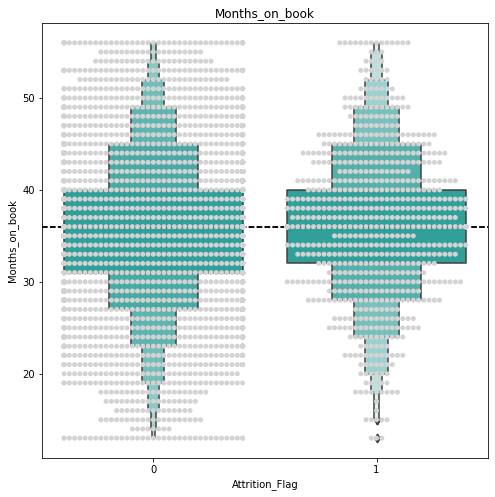

                  count   mean   std    min    25%    50%    75%    max
Attrition_Flag                                                         
0              4759.000 35.933 8.103 13.000 31.000 36.000 40.000 56.000
1               911.000 36.266 7.797 13.000 32.000 36.000 40.000 56.000 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2115736.0, pvalue=0.24721687783870283)

____________________

Credit_Limit 
____________________



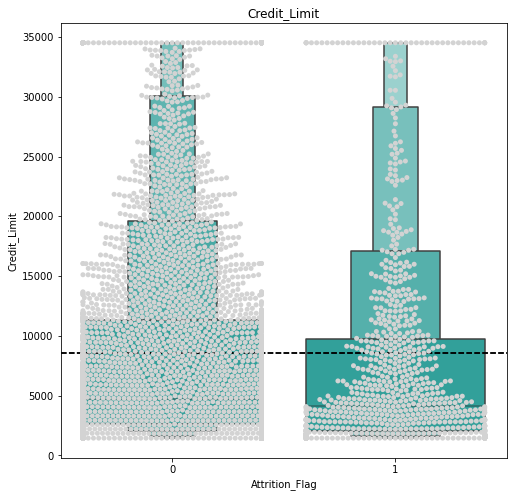

                  count     mean      std      min      25%      50%  \
Attrition_Flag                                                         
0              4759.000 8697.779 8946.535 1438.300 2638.500 4724.000   
1               911.000 7918.487 8741.045 1438.300 2074.500 4142.000   

                     75%       max  
Attrition_Flag                      
0              11353.000 34516.000  
1               9711.000 34516.000   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2371830.0, pvalue=6.49214266249337e-06)

____________________

Total_Revolving_Bal 
____________________



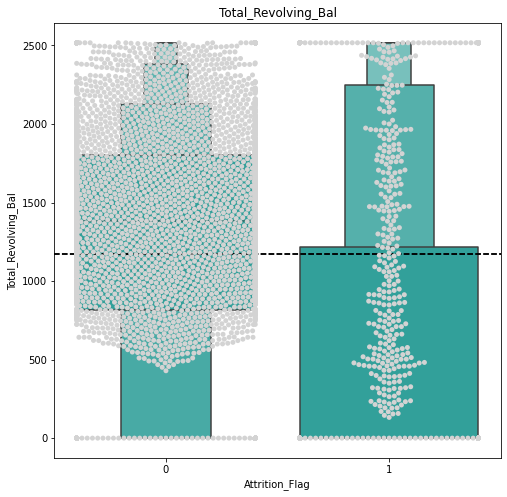

                  count     mean     std   min     25%      50%      75%  \
Attrition_Flag                                                             
0              4759.000 1269.459 753.835 0.000 816.000 1384.000 1805.000   
1               911.000  645.547 910.101 0.000   0.000    0.000 1218.500   

                    max  
Attrition_Flag           
0              2517.000  
1              2517.000   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3032715.0, pvalue=1.538991626599627e-82)

____________________

Total_Trans_Amt 
____________________



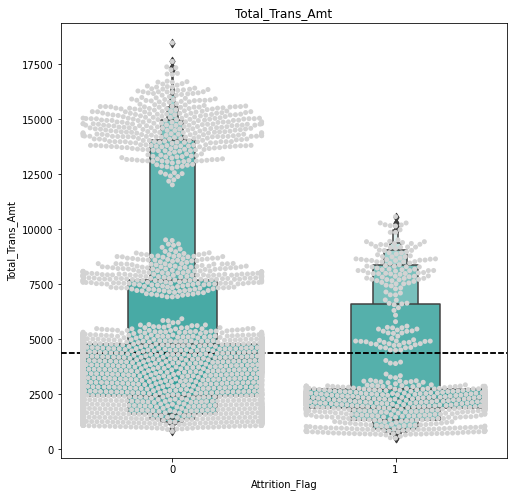

                  count     mean      std     min      25%      50%      75%  \
Attrition_Flag                                                                 
0              4759.000 4648.677 3480.097 816.000 2426.500 4105.000 4792.000   
1               911.000 3011.269 2265.554 510.000 1868.000 2305.000 2732.500   

                     max  
Attrition_Flag            
0              18484.000  
1              10583.000   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2989770.0, pvalue=1.0512286334977285e-73)

____________________

Total_Trans_Ct 
____________________



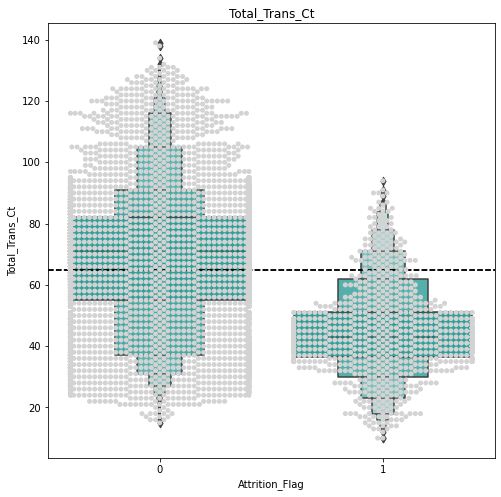

                  count   mean    std    min    25%    50%    75%     max
Attrition_Flag                                                           
0              4759.000 68.733 22.914 15.000 55.000 71.000 82.000 139.000
1               911.000 44.637 14.640 10.000 36.500 43.000 51.000  94.000 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3461619.5, pvalue=9.433752567685912e-180)

____________________

Total_Amt_Chng_Q4_Q1 
____________________



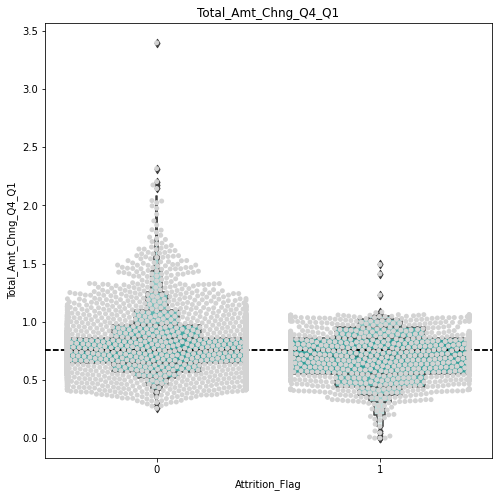

                  count  mean   std   min   25%   50%   75%   max
Attrition_Flag                                                   
0              4759.000 0.773 0.213 0.256 0.644 0.745 0.862 3.397
1               911.000 0.696 0.216 0.000 0.548 0.703 0.857 1.492 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2508486.0, pvalue=5.1421698487590004e-14)

____________________

Total_Ct_Chng_Q4_Q1 
____________________



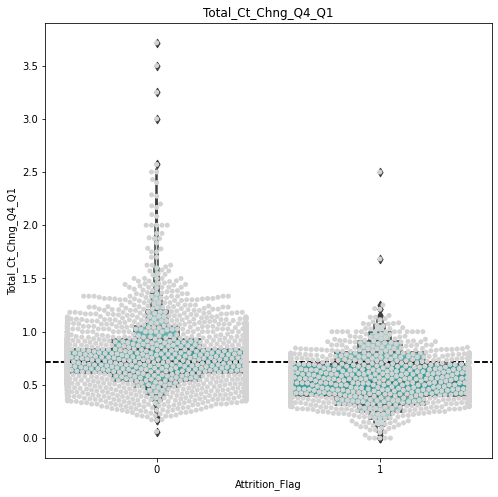

                  count  mean   std   min   25%   50%   75%   max
Attrition_Flag                                                   
0              4759.000 0.745 0.231 0.062 0.615 0.720 0.837 3.714
1               911.000 0.551 0.230 0.000 0.394 0.524 0.692 2.500 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3242121.0, pvalue=1.5188719510853171e-124)

____________________

Avg_Utilization_Ratio 
____________________



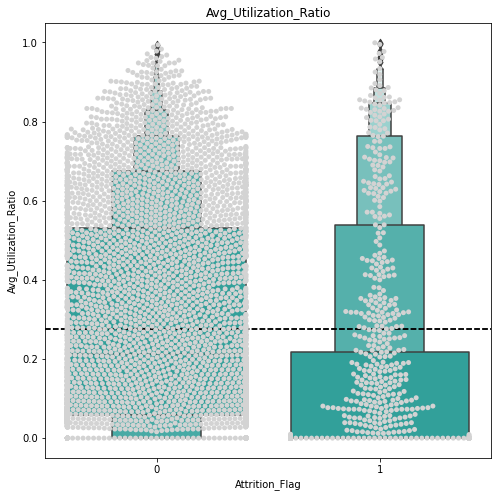

                  count  mean   std   min   25%   50%   75%   max
Attrition_Flag                                                   
0              4759.000 0.298 0.271 0.000 0.058 0.213 0.531 0.994
1               911.000 0.156 0.259 0.000 0.000 0.000 0.217 0.999 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3022581.5, pvalue=1.186575172457082e-80)

____________________



In [31]:
# Bivariate Analysis 
wrangle.explore_bivariate(train, target, cat_var2, quant_var)

#### Statistical Hypothesis take away
Although I performed statistical tests on many variables as it relates to the product taken, i will mention the hypothesis of of 
 is different in each occupation group.
- Customers with advanced degrees are more like ly to churn than those without
- some customers are less statisfied with Platinum card than with blue card. 
- Customers withless relationship with the bank are more likely to churn than those with 4 or more
-  Marital status does not have a significant effect on whether or nor a customer will churn
- those who are not active ith the bank are more like to churn than thore are active
- those with more contact withe bank are more like to churn than those with less contact . May the are dissatisfied with a product or service?
- Although there are more females, they are more likely to churn than males
- Dependents count does not have a significant effect on churning rate
- Age and months on booth does not affect churning
- Customes with a balance less than  1000 are more likely to churn than those with ahigh balance
- Those who have less transaction count with the bak are more like lly to churn than those with more transaction counts 

## Modeling & Evaluation
#### Model evaluation criterion
- Could inacurrately identify churners - Loss of money in marketing capaign
- Not accurately identify to non-churners - Loss of opportunity
- Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

In [32]:
# Creating dummy variables for categorical variables
train = pd.get_dummies(data=train, drop_first=True)
validate = pd.get_dummies(data=validate, drop_first=True)
test = pd.get_dummies(data=test, drop_first=True)

In [33]:
X_train = train.drop(columns=['Attrition_Flag'])
y_train = train.Attrition_Flag

X_validate = validate.drop(columns=['Attrition_Flag'])
y_validate = validate.Attrition_Flag

X_test = test.drop(columns=['Attrition_Flag'])
y_test = test.Attrition_Flag

In [34]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_validate, model.predict(X_validate))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 80.79445145018916
Random forest: 76.8384074941452
GBM: 82.10952981444785
Adaboost: 83.31772053083529
Xgboost: 80.90133909806042
dtree: 78.04900018014773
Logistic Regression: 48.077223323124954

Validation Performance:

Bagging: 0.8235294117647058
Random forest: 0.8081841432225064
GBM: 0.8516624040920716
Adaboost: 0.8337595907928389
Xgboost: 0.8567774936061381
dtree: 0.8337595907928389
Logistic Regression: 0.46547314578005117


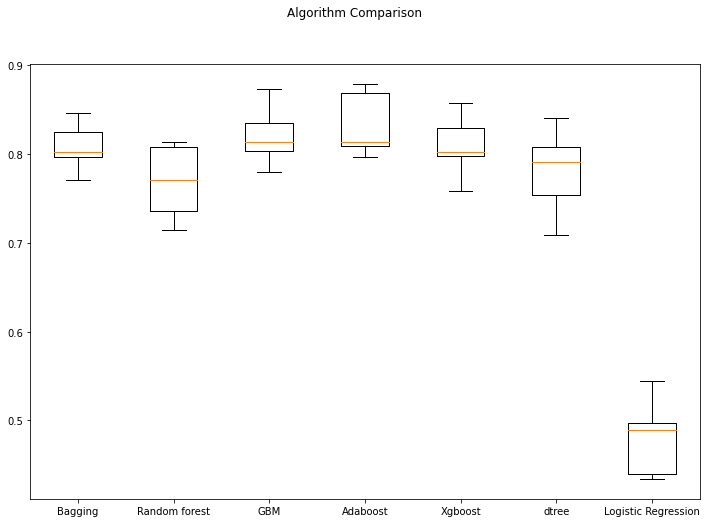

In [35]:
from IPython.core.pylabtools import figsize
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12,8))

fig.suptitle("Algorithm Comparison")
#figure(figsize=(8,6))
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- Adaboost, XGboost, GBoost show up as potential good models for this data set 
- I ended up bulding 21 models to lect the best one 

### 1. Model Logistic Regression 

In [36]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.895   0.512      0.753 0.609
************************************
Validation performance:
   Accuracy  Recall  Precision    F1
0     0.884   0.465      0.711 0.563


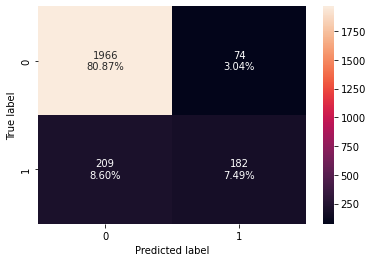

In [37]:
# Calculating different metrics on train set
log_reg_model_train_perf = wrangle.model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
print(log_reg_model_train_perf)
print('************************************')
# Calculating different metrics on validation set
log_reg_model_validate_perf = wrangle.model_performance_classification_sklearn(lr, X_validate, y_validate)
print("Validation performance:")
print(log_reg_model_validate_perf)
('************************************')
# creating confusion matrix
wrangle.confusion_matrix_sklearn(lr, X_validate, y_validate)

### 2. Decision Tree

In [38]:
#Fitting the model
d_tree = DecisionTreeClassifier(class_weight={0:0.16,1:0.84},random_state=1)
d_tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
************************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.940   0.834      0.801 0.817
************************************


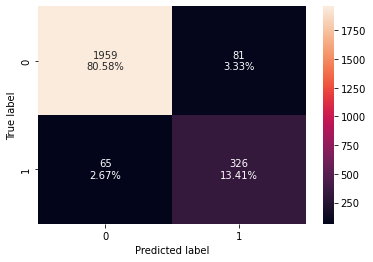

In [39]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=wrangle.model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
print('************************************')
dtree_model_validate_perf=wrangle.model_performance_classification_sklearn(d_tree,X_validate,y_validate)
print("Validate performance:\n",dtree_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(d_tree, X_validate, y_validate)

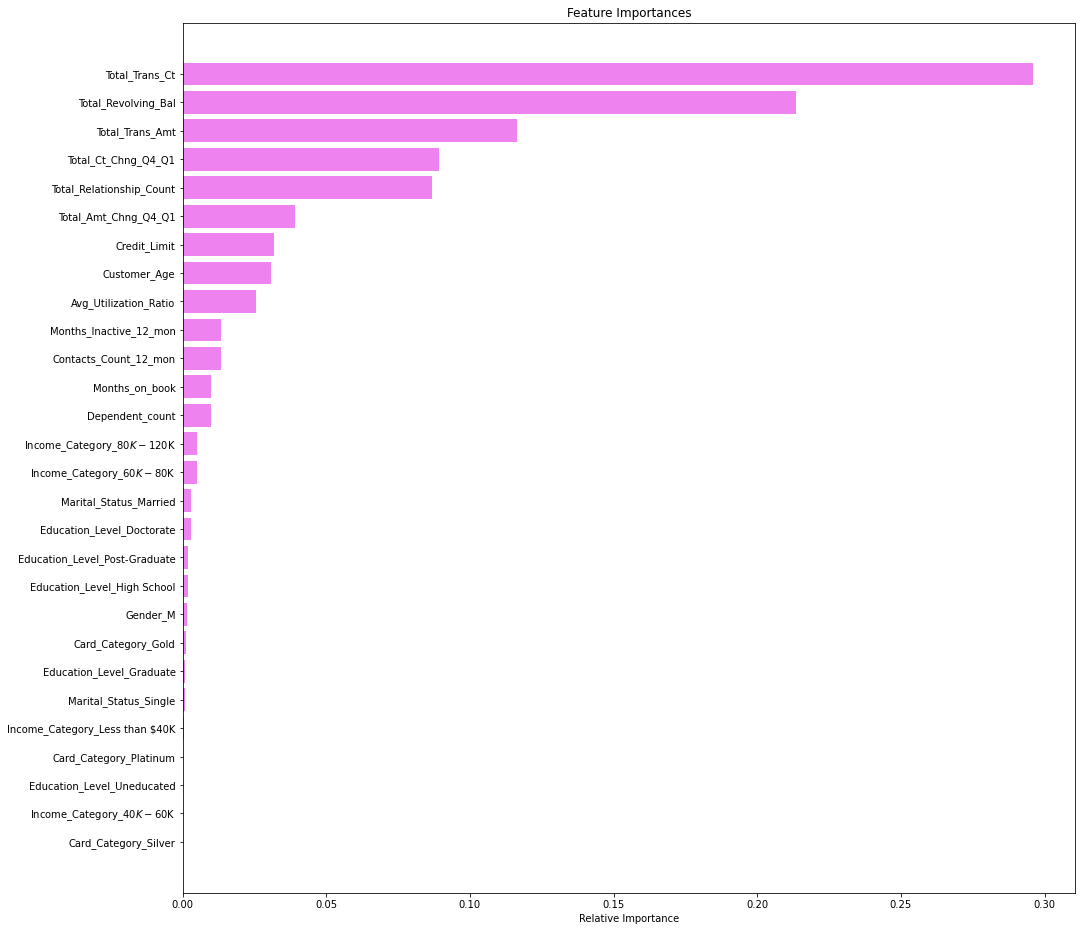

In [40]:
feature_names = X_train.columns
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3. Radom Forest model

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
************************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.955   0.808      0.900 0.852
************************************


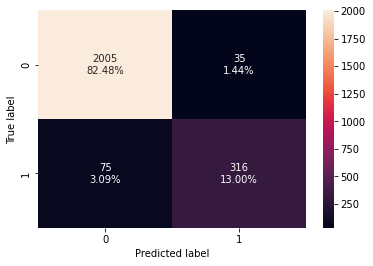

In [41]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=wrangle.model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
print('************************************')
rf_estimator_model_validate_perf=wrangle.model_performance_classification_sklearn(rf_estimator,X_validate,y_validate)
print("Validate performance:\n",rf_estimator_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(rf_estimator, X_validate, y_validate)

### 4. bagging model

Training performance:
    Accuracy  Recall  Precision    F1
0     0.996   0.979      0.998 0.988
************************************
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.954   0.824      0.882 0.852
************************************


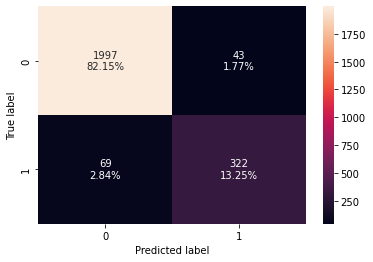

In [42]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=wrangle.model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
print('************************************')
bagging_classifier_model_validate_perf=wrangle.model_performance_classification_sklearn(bagging_classifier,X_validate,y_validate)
print("Testing performance:\n",bagging_classifier_model_validate_perf)
#Creating confusion matrix
print('************************************')

wrangle.confusion_matrix_sklearn(bagging_classifier, X_validate, y_validate)

### 5. Adaboost model

   Accuracy  Recall  Precision    F1
0     0.962   0.851      0.907 0.878
************************************
   Accuracy  Recall  Precision    F1
0     0.955   0.834      0.881 0.857
************************************


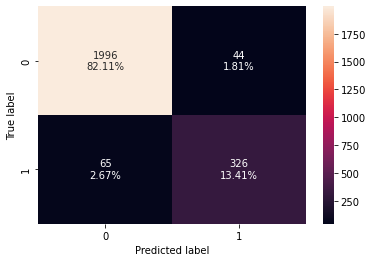

In [43]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=wrangle.model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
print('************************************')
ab_classifier_model_validate_perf=wrangle.model_performance_classification_sklearn(ab_classifier,X_validate,y_validate)
print(ab_classifier_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(ab_classifier,X_validate,y_validate)

### 6. Gradien Boosting model

Training performance:
    Accuracy  Recall  Precision    F1
0     0.978   0.896      0.962 0.928
************************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.963   0.852      0.910 0.880
************************************


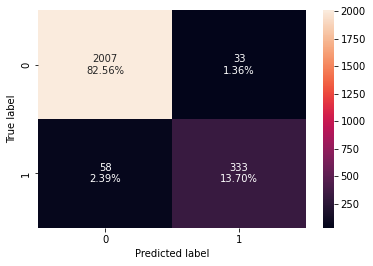

In [44]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=wrangle.model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
print('************************************')
gb_classifier_model_validate_perf=wrangle.model_performance_classification_sklearn(gb_classifier,X_validate,y_validate)
print("Validate performance:\n",gb_classifier_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(gb_classifier,X_validate,y_validate)

### 7. Extreme Gradien Boosting

Training performance:
    Accuracy  Recall  Precision    F1
0     0.976   0.887      0.960 0.922
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.963   0.857      0.905 0.880


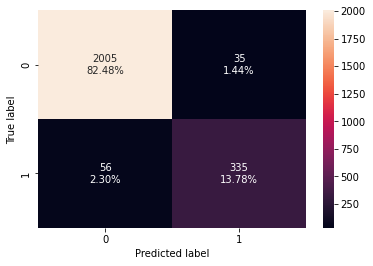

In [45]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=wrangle.model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_validate_perf=wrangle.model_performance_classification_sklearn(xgb_classifier,X_validate,y_validate)
print("Validate performance:\n",xgb_classifier_model_validate_perf)

#Creating confusion matrix
wrangle.confusion_matrix_sklearn(xgb_classifier,X_validate,y_validate)

In [46]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        dtree_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        xgb_classifier_model_train_perf.T
        
       
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Frorest",
    "Bagging",
    "Adaboost",
    "Gadien Boost",
    "XG Boost"
]
print("Training performance comparison:")
models_train_comp_df.T


Training performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.895,0.512,0.753,0.609
Decision Tree,1.000,1.000,1.000,1.000
Random Frorest,1.000,1.000,1.000,1.000
Bagging,0.996,0.979,0.998,0.988
Adaboost,0.962,0.851,0.907,0.878
Gadien Boost,0.978,0.896,0.962,0.928
XG Boost,0.976,0.887,0.960,0.922


In [47]:
# Validate performance comparison

models_validate_comp_df = pd.concat(
    [
        log_reg_model_validate_perf.T,
        dtree_model_validate_perf.T,
        rf_estimator_model_validate_perf.T,
        bagging_classifier_model_validate_perf.T,
        ab_classifier_model_validate_perf.T,
        gb_classifier_model_validate_perf.T,
        xgb_classifier_model_validate_perf.T
        
       
    ],
    axis=1,
)
models_validate_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Frorest",
    "Bagging",
    "Adaboost",
    "Gadien Boost",
    "XG Boost"
]
print("Validate performance comparison:")
models_validate_comp_df.T


Validate performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.884,0.465,0.711,0.563
Decision Tree,0.940,0.834,0.801,0.817
Random Frorest,0.955,0.808,0.900,0.852
Bagging,0.954,0.824,0.882,0.852
Adaboost,0.955,0.834,0.881,0.857
Gadien Boost,0.963,0.852,0.910,0.880
XG Boost,0.963,0.857,0.905,0.880


### Key takeaway for the 7 first models
- Decision Tre and radom forest overfit the model. The feature importance for decision tree are total transaction count, total transaction amount, revolving bhalance
- Logistic regression has a low recall score 
- bagging and all the boosting algorithm seem to perform well on the training and validate sets

## Over Sampling using SMOTE

In [48]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 911
Before UpSampling, counts of label 'No': 4759 

After UpSampling, counts of label 'Yes': 4759
After UpSampling, counts of label 'No': 4759 

After UpSampling, the shape of train_X: (9518, 28)
After UpSampling, the shape of train_y: (9518,) 



### 8. Logistic Regression Oversampling

In [49]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.827   0.814      0.835 0.824
*************************************
validation performance:
   Accuracy  Recall  Precision    F1
0     0.820   0.760      0.463 0.576
*************************************


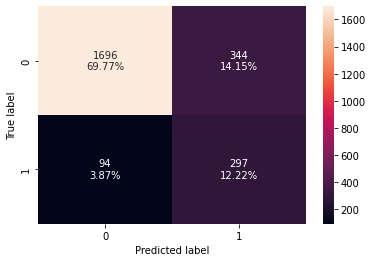

In [50]:
# Calculating different metrics on train set
log_reg_over_train_perf = wrangle.model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
print(log_reg_over_train_perf)
print('*************************************')
# Calculating different metrics on validation set
log_reg_over_val_perf = wrangle.model_performance_classification_sklearn(
    log_reg_over, X_validate, y_validate
)
print("validation performance:")
print(log_reg_over_val_perf)
print('*************************************')
# creating confusion matrix
wrangle.confusion_matrix_sklearn(log_reg_over, X_validate, y_validate)

### 9. Decision Tree oversampled

In [51]:
d_tree_over = DecisionTreeClassifier(random_state=1)

# Training the basic decision tree model with training set
d_tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
**********************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.926   0.831      0.739 0.782
**********************************


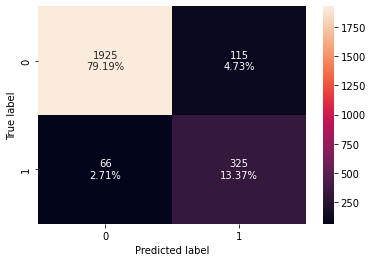

In [52]:
#Calculating different metrics
dtree_over_model_train_perf=wrangle.model_performance_classification_sklearn(d_tree_over,X_train_over,y_train_over)
print("Training performance:\n",dtree_over_model_train_perf)
print('**********************************')
dtree_over_model_validate_perf=wrangle.model_performance_classification_sklearn(d_tree_over,X_validate,y_validate)
print("Validate performance:\n",dtree_over_model_validate_perf)
print('**********************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(d_tree_over, X_validate, y_validate)
 


### 10. Random Forest oversampling

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
****************************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.954   0.862      0.853 0.858
****************************************


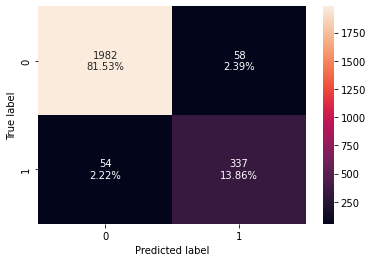

In [53]:
#Fitting the model
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over,y_train_over)

#Calculating different metrics
rf_over_model_train_perf=wrangle.model_performance_classification_sklearn(rf_over,X_train_over,y_train_over)
print("Training performance:\n",rf_over_model_train_perf)
print('****************************************')
rf_over_model_validate_perf=wrangle.model_performance_classification_sklearn(rf_over,X_validate,y_validate)
print("Validate performance:\n",rf_over_model_validate_perf)
print('****************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(rf_over, X_validate, y_validate)

### 11. Bagging Oversampling

   Accuracy  Recall  Precision    F1
0     0.999   0.998      0.999 0.999
************************************
   Accuracy  Recall  Precision    F1
0     0.945   0.880      0.800 0.838
************************************


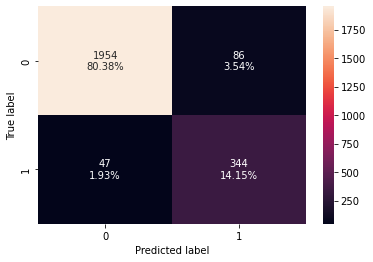

In [54]:
#Fitting the model
bag_classifier_over = BaggingClassifier(random_state=1)
bag_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
bag_over_model_train_perf=wrangle.model_performance_classification_sklearn(bag_classifier_over,X_train_over,y_train_over)
print(bag_over_model_train_perf)
print('************************************')
bag_over_model_validate_perf=wrangle.model_performance_classification_sklearn(bag_classifier_over,X_validate,y_validate)
print(bag_over_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(bag_classifier_over,X_validate,y_validate)

### 12. AdaBoost Over Sampling

   Accuracy  Recall  Precision    F1
0     0.964   0.970      0.959 0.964
************************************
   Accuracy  Recall  Precision    F1
0     0.941   0.862      0.789 0.824
************************************


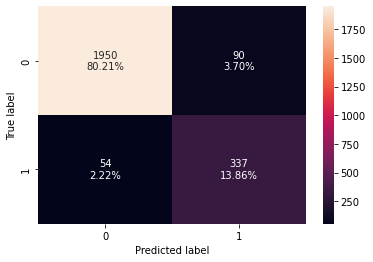

In [55]:
#Fitting the model
ab_classifier_over = AdaBoostClassifier(random_state=1)
ab_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
ab_over_model_train_perf=wrangle.model_performance_classification_sklearn(ab_classifier_over,X_train_over,y_train_over)
print(ab_over_model_train_perf)
print('************************************')
ab_over_model_validate_perf=wrangle.model_performance_classification_sklearn(ab_classifier_over,X_validate,y_validate)
print(ab_over_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(ab_classifier_over,X_validate,y_validate)

### 13. Gradien Boost oversampling

   Accuracy  Recall  Precision    F1
0     0.978   0.980      0.975 0.978
************************************
   Accuracy  Recall  Precision    F1
0     0.956   0.898      0.840 0.868
************************************


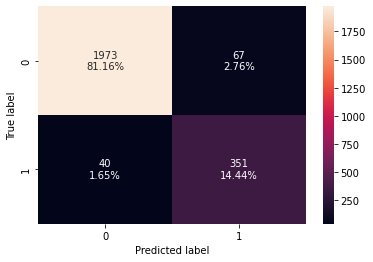

In [56]:
#Fitting the model
grab_classifier_over =  GradientBoostingClassifier(random_state=1)
grab_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
grab_over_model_train_perf=wrangle.model_performance_classification_sklearn(grab_classifier_over,X_train_over,y_train_over)
print(grab_over_model_train_perf)
print('************************************')
grab_over_model_validate_perf=wrangle.model_performance_classification_sklearn(grab_classifier_over,X_validate,y_validate)
print(grab_over_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(grab_classifier_over,X_validate,y_validate)

### 14. Extreme Gradien Boost Over sampling

   Accuracy  Recall  Precision    F1
0     0.978   0.980      0.975 0.978
************************************
   Accuracy  Recall  Precision    F1
0     0.951   0.903      0.815 0.857
************************************


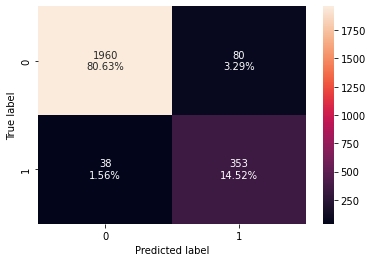

In [57]:
#Fitting the model
ex_grab_classifier_over = XGBClassifier(random_state=1, eval_metric='logloss')
ex_grab_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
ex_grab_over_model_train_perf=wrangle.model_performance_classification_sklearn(ex_grab_classifier_over,X_train_over,y_train_over)
print(grab_over_model_train_perf)
print('************************************')
ex_grab_over_model_validate_perf=wrangle.model_performance_classification_sklearn(ex_grab_classifier_over,X_validate,y_validate)
print(ex_grab_over_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(ex_grab_classifier_over,X_validate,y_validate)

In [58]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_over_train_perf.T,
        dtree_over_model_train_perf.T,
        rf_over_model_train_perf.T,
        bag_over_model_train_perf.T,
        ab_over_model_train_perf.T,
        grab_over_model_train_perf.T,
        ex_grab_over_model_train_perf.T
        
       
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression OverSampled",
    "Decision Tree  OverSampled",
    "Random Frorest  OverSampled",
    "Bagging  OverSampled",
    "Adaboost  OverSampled",
    "Gadien Boost  OverSampled",
    "XG Boos  OverSampledt"
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression OverSampled,0.827,0.814,0.835,0.824
Decision Tree OverSampled,1.000,1.000,1.000,1.000
Random Frorest OverSampled,1.000,1.000,1.000,1.000
Bagging OverSampled,0.999,0.998,0.999,0.999
Adaboost OverSampled,0.964,0.970,0.959,0.964
Gadien Boost OverSampled,0.978,0.980,0.975,0.978
XG Boos OverSampledt,0.977,0.980,0.975,0.977


In [59]:
# Validate performance comparison

models_validate_comp_df = pd.concat(
    [
        log_reg_over_val_perf.T,
        dtree_over_model_validate_perf.T,
        rf_over_model_validate_perf.T,
        bag_over_model_validate_perf.T,
        ab_over_model_validate_perf.T,
        grab_over_model_validate_perf.T,
        ex_grab_over_model_validate_perf.T
        
       
    ],
    axis=1,
)
models_validate_comp_df.columns = [
    "Logistic Regression  OverSampled",
    "Decision Tree  OverSampled",
    "Random Frorest   OverSampled",
    "Bagging   OverSampled",
    "Adaboost   OverSampled",
    "Gadien Boost   OverSampled",
    "XG Boost   OverSampled"
]
print("Validate performance comparison:")
models_validate_comp_df.T

Validate performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression OverSampled,0.820,0.760,0.463,0.576
Decision Tree OverSampled,0.926,0.831,0.739,0.782
Random Frorest OverSampled,0.954,0.862,0.853,0.858
Bagging OverSampled,0.945,0.880,0.800,0.838
Adaboost OverSampled,0.941,0.862,0.789,0.824
Gadien Boost OverSampled,0.956,0.898,0.840,0.868
XG Boost OverSampled,0.951,0.903,0.815,0.857


### Key takeaway for oversampling the models with SMOTE

- Decision tree and random forest still overfit the models 
- logistic regression recall score  has improve both on the training and validate , but with a very loe precision and f1 score
- Bagging and boosting models have no significant changes

## Under Sampling with SMOTE

In [60]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [61]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 911
Before Under Sampling, counts of label 'No': 4759 

After Under Sampling, counts of label 'Yes': 911
After Under Sampling, counts of label 'No': 911 

After Under Sampling, the shape of train_X: (1822, 28)
After Under Sampling, the shape of train_y: (1822,) 



### 15. Logistic Regression Under sampling

In [62]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.790   0.788      0.791 0.789
**********************************
Validation performance:
   Accuracy  Recall  Precision    F1
0     0.806   0.790      0.443 0.567


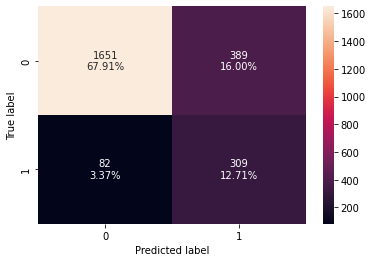

In [63]:
# Calculating different metrics on train set
log_reg_under_train_perf = wrangle.model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
print(log_reg_under_train_perf)
print('**********************************')
# Calculating different metrics on validation set
log_reg_under_val_perf = wrangle.model_performance_classification_sklearn(
    log_reg_under, X_validate, y_validate
)
print("Validation performance:")
print(log_reg_under_val_perf)
('**********************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(log_reg_under, X_validate, y_validate)

### 16. Decision Tree Under Sampled

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
**********************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.889   0.854      0.612 0.713
**********************************


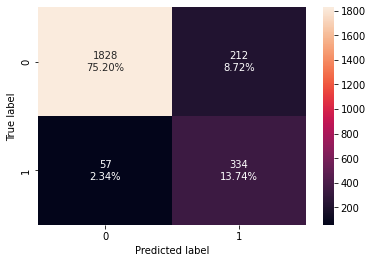

In [64]:
d_tree_under = DecisionTreeClassifier(random_state=1)

# Training the basic decision tree model with training set
d_tree_under.fit(X_train_un, y_train_un)
#Calculating different metrics
dtree_under_model_train_perf=wrangle.model_performance_classification_sklearn(d_tree_under,X_train_un,y_train_un)
print("Training performance:\n",dtree_over_model_train_perf)
print('**********************************')
dtree_under_model_validate_perf=wrangle.model_performance_classification_sklearn(d_tree_under,X_validate,y_validate)
print("Validate performance:\n",dtree_under_model_validate_perf)
print('**********************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(d_tree_under, X_validate, y_validate)

### 17. Random Forest Under Sampled

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
****************************************
Validate performance:
    Accuracy  Recall  Precision    F1
0     0.920   0.934      0.685 0.790
****************************************


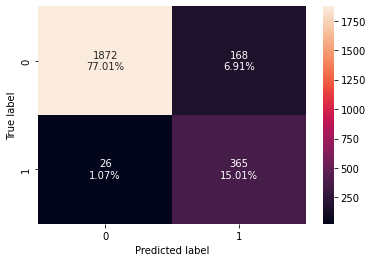

In [65]:
#Fitting the model
rf_under = RandomForestClassifier(random_state=1)
rf_under.fit(X_train_un,y_train_un)

#Calculating different metrics
rf_under_model_train_perf=wrangle.model_performance_classification_sklearn(rf_under,X_train_over,y_train_over)
print("Training performance:\n",rf_over_model_train_perf)
print('****************************************')
rf_under_model_validate_perf=wrangle.model_performance_classification_sklearn(rf_under,X_validate,y_validate)
print("Validate performance:\n",rf_under_model_validate_perf)
print('****************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(rf_under, X_validate, y_validate)

### 18. Bagging Under Sampled

   Accuracy  Recall  Precision    F1
0     0.995   0.993      0.997 0.995
************************************
   Accuracy  Recall  Precision    F1
0     0.917   0.898      0.684 0.777
************************************


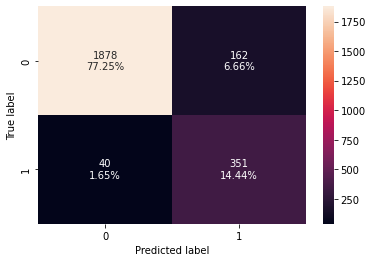

In [66]:
#Fitting the model
bag_classifier_under = BaggingClassifier(random_state=1)
bag_classifier_under.fit(X_train_un,y_train_un)

#Calculating different metrics
bag_under_model_train_perf=wrangle.model_performance_classification_sklearn(bag_classifier_under,X_train_un,y_train_un)
print(bag_under_model_train_perf)
print('************************************')
bag_under_model_validate_perf=wrangle.model_performance_classification_sklearn(bag_classifier_under,X_validate,y_validate)
print(bag_under_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(bag_classifier_under,X_validate,y_validate)

### 19. Adaboost Under Sampled

   Accuracy  Recall  Precision    F1
0     0.956   0.963      0.950 0.956
************************************
   Accuracy  Recall  Precision    F1
0     0.926   0.926      0.706 0.801
************************************


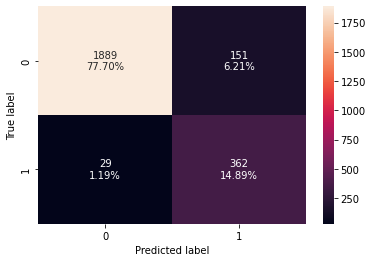

In [67]:
#Fitting the model
ab_classifier_under = AdaBoostClassifier(random_state=1)
ab_classifier_under.fit(X_train_un,y_train_un)

#Calculating different metrics
ab_under_model_train_perf=wrangle.model_performance_classification_sklearn(ab_classifier_under,X_train_un,y_train_un)
print(ab_under_model_train_perf)
print('************************************')
ab_under_model_validate_perf=wrangle.model_performance_classification_sklearn(ab_classifier_under,X_validate,y_validate)
print(ab_under_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(ab_classifier_under,X_validate,y_validate)

### 20. Gradien boost Under Sampled

   Accuracy  Recall  Precision    F1
0     0.980   0.987      0.974 0.980
************************************
   Accuracy  Recall  Precision    F1
0     0.933   0.944      0.725 0.820
************************************


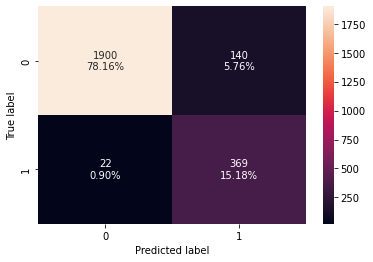

In [68]:
#Fitting the model
grab_classifier_under =  GradientBoostingClassifier(random_state=1)
grab_classifier_under.fit(X_train_un,y_train_un)

#Calculating different metrics
grab_under_model_train_perf=wrangle.model_performance_classification_sklearn(grab_classifier_under,X_train_un,y_train_un)
print(grab_under_model_train_perf)
print('************************************')
grab_under_model_validate_perf=wrangle.model_performance_classification_sklearn(grab_classifier_under,X_validate,y_validate)
print(grab_under_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(grab_classifier_under,X_validate,y_validate)

### 21. XG Boost Under Sampled

   Accuracy  Recall  Precision    F1
0     0.980   0.987      0.974 0.980
************************************
   Accuracy  Recall  Precision    F1
0     0.924   0.934      0.698 0.799
************************************


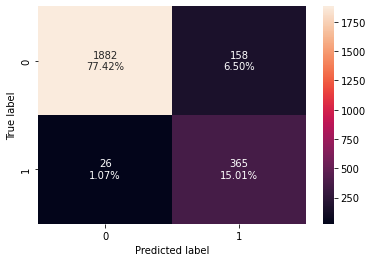

In [69]:
#Fitting the model
ex_grab_classifier_under = XGBClassifier(random_state=1, eval_metric='logloss')
ex_grab_classifier_under.fit(X_train_un,y_train_un)

#Calculating different metrics
ex_grab_under_model_train_perf=wrangle.model_performance_classification_sklearn(ex_grab_classifier_under,X_train_un,y_train_un)
print(grab_under_model_train_perf)
print('************************************')
ex_grab_under_model_validate_perf=wrangle.model_performance_classification_sklearn(ex_grab_classifier_under,X_validate,y_validate)
print(ex_grab_under_model_validate_perf)
print('************************************')
#Creating confusion matrix
wrangle.confusion_matrix_sklearn(ex_grab_classifier_under,X_validate,y_validate)

In [70]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_under_train_perf.T,
        dtree_under_model_train_perf.T,
        rf_under_model_train_perf.T,
        bag_under_model_train_perf.T,
        ab_under_model_train_perf.T,
        grab_under_model_train_perf.T,
        ex_grab_under_model_train_perf.T
        
       
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression  UnderSampled",
    "Decision Tree  UnderSampled",
    "Random Frorest   UnderSampled",
    "Bagging   UnderSampled",
    "Adaboost  UnderSampled",
    "Gadien Boost   UnderSampled",
    "XG Boos   UnderSampled"
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression UnderSampled,0.790,0.788,0.791,0.789
Decision Tree UnderSampled,1.000,1.000,1.000,1.000
Random Frorest UnderSampled,0.964,0.980,0.948,0.964
Bagging UnderSampled,0.995,0.993,0.997,0.995
Adaboost UnderSampled,0.956,0.963,0.950,0.956
Gadien Boost UnderSampled,0.980,0.987,0.974,0.980
XG Boos UnderSampled,0.974,0.979,0.970,0.974


In [71]:
# Validate performance comparison

models_validate_comp_df = pd.concat(
    [
        log_reg_under_val_perf.T,
        dtree_under_model_validate_perf.T,
        rf_under_model_validate_perf.T,
        bag_under_model_validate_perf.T,
        ab_under_model_validate_perf.T,
        grab_under_model_validate_perf.T,
        ex_grab_under_model_validate_perf.T
        
       
    ],
    axis=1,
)
models_validate_comp_df.columns = [
    "Logistic Regression UnderSampled",
    "Decision Tree  UnderSampled",
    "Random Frorest  UnderSampled",
    "Bagging  UnderSampled",
    "Adaboost  UnderSampled",
    "Gadien Boost  UnderSampled",
    "XG Boost  UnderSampled"
]
print("Validate performance comparison:")
models_validate_comp_df.T

Validate performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression UnderSampled,0.806,0.790,0.443,0.567
Decision Tree UnderSampled,0.889,0.854,0.612,0.713
Random Frorest UnderSampled,0.920,0.934,0.685,0.790
Bagging UnderSampled,0.917,0.898,0.684,0.777
Adaboost UnderSampled,0.926,0.926,0.706,0.801
Gadien Boost UnderSampled,0.933,0.944,0.725,0.820
XG Boost UnderSampled,0.924,0.934,0.698,0.799


## Under Sampling Using SMOTE

### Key takeaways
- Decision tree is stil overfitted 
- no significant change on the logistic regression model
- Random forest performance hs improved ,but the presion and f1 score are still low

### All Models Comparison
- Training performance

In [72]:
# training performance comparison

models_train_comp_df = pd.concat(
    
    [   log_reg_model_train_perf.T,
        dtree_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        log_reg_over_train_perf.T,
        dtree_over_model_train_perf.T,
        rf_over_model_train_perf.T,
        bag_over_model_train_perf.T,
        ab_over_model_train_perf.T,
        grab_over_model_train_perf.T,
        ex_grab_over_model_train_perf.T,      
        log_reg_under_train_perf.T,
        dtree_under_model_train_perf.T,
        rf_under_model_train_perf.T,
        bag_under_model_train_perf.T,
        ab_under_model_train_perf.T,
        grab_under_model_train_perf.T,
        ex_grab_under_model_train_perf.T
        
       
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Frorest",
    "Bagging",
    "Adaboost",
    "Gadien Boost",
    "XG Boost",                      
    "Logistic Regression OverSampled",
    "Decision Tree  OverSampled",
    "Random Frorest  OverSampled",
    "Bagging  OverSampled",
    "Adaboost  OverSampled",
    "Gadien Boost  OverSampled",
    "XG Boos  OverSampledt",                                                          
    "Logistic Regression  UnderSampled",
    "Decision Tree  UnderSampled",
    "Random Frorest   UnderSampled",
    "Bagging   UnderSampled",
    "Adaboost  UnderSampled",
    "Gadien Boost   UnderSampled",
    "XG Boos   UnderSampled"
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.895,0.512,0.753,0.609
Decision Tree,1.000,1.000,1.000,1.000
Random Frorest,1.000,1.000,1.000,1.000
Bagging,0.996,0.979,0.998,0.988
Adaboost,0.962,0.851,0.907,0.878
Gadien Boost,0.978,0.896,0.962,0.928
XG Boost,0.976,0.887,0.960,0.922
Logistic Regression OverSampled,0.827,0.814,0.835,0.824
Decision Tree OverSampled,1.000,1.000,1.000,1.000
Random Frorest OverSampled,1.000,1.000,1.000,1.000


- Validate performance

In [73]:
models_validate_comp_df = pd.concat(
    [
        log_reg_model_validate_perf.T,
        dtree_model_validate_perf.T,
        rf_estimator_model_validate_perf.T,
        bagging_classifier_model_validate_perf.T,
        ab_classifier_model_validate_perf.T,
        gb_classifier_model_validate_perf.T,
        xgb_classifier_model_validate_perf.T,
        log_reg_over_val_perf.T,
        dtree_over_model_validate_perf.T,
        rf_over_model_validate_perf.T,
        bag_over_model_validate_perf.T,
        ab_over_model_validate_perf.T,
        grab_over_model_validate_perf.T,
        ex_grab_over_model_validate_perf.T,
         log_reg_under_val_perf.T,
        dtree_under_model_validate_perf.T,
        rf_under_model_validate_perf.T,
        bag_under_model_validate_perf.T,
        ab_under_model_validate_perf.T,
        grab_under_model_validate_perf.T,
        ex_grab_under_model_validate_perf.T
        
        
       
    ],
    axis=1,
)
models_validate_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Frorest",
    "Bagging",
    "Adaboost",
    "Gadien Boost",
    "XG Boost",
    "Logistic Regression  OverSampled",
    "Decision Tree  OverSampled",
    "Random Frorest   OverSampled",
    "Bagging   OverSampled",
    "Adaboost   OverSampled",
    "Gadien Boost   OverSampled",
    "XG Boost   OverSampled",
    "Logistic Regression  UnderSampled",
    "Decision Tree  UnderSampled",
    "Random Frorest   UnderSampled",
    "Bagging   UnderSampled",
    "Adaboost  UnderSampled",
    "Gadien Boost   UnderSampled",
    "XG Boos   UnderSampled"
]
print("Validate performance comparison:")
models_validate_comp_df.T

Validate performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.884,0.465,0.711,0.563
Decision Tree,0.940,0.834,0.801,0.817
Random Frorest,0.955,0.808,0.900,0.852
Bagging,0.954,0.824,0.882,0.852
Adaboost,0.955,0.834,0.881,0.857
Gadien Boost,0.963,0.852,0.910,0.880
XG Boost,0.963,0.857,0.905,0.880
Logistic Regression OverSampled,0.820,0.760,0.463,0.576
Decision Tree OverSampled,0.926,0.831,0.739,0.782
Random Frorest OverSampled,0.954,0.862,0.853,0.858


### The 3 best performing models are 

- Undersampled Adaboost
- Undersampled Gradien Boost
- Undersambled XG boost

### Tuning the best models with Gridseach

In [74]:

# defining model
model = ab_classifier_under

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8638803819131688:


In [75]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.982   0.933      0.952 0.942
*************************************
Validate performance:
   Accuracy  Recall  Precision    F1
0     0.962   0.887      0.878 0.883
*************************************


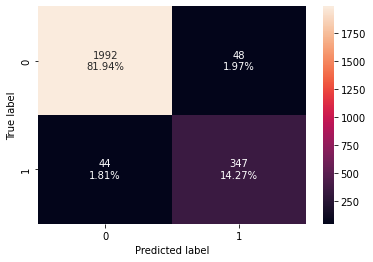

In [76]:
# Calculating different metrics on train set
Adaboost_random_train = wrangle.model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
print(Adaboost_random_train)


print("*************************************")
Adaboost_random_validate = wrangle.model_performance_classification_sklearn(
    adb_tuned2, X_validate, y_validate
)
print("Validate performance:")
print(Adaboost_random_validate)


print("*************************************")

# creating confusion matrix
wrangle.confusion_matrix_sklearn(adb_tuned2, X_validate, y_validate)

In [77]:
# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9616045157028763:


In [78]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', gamma=1, learning_rate=0.05,
              n_estimators=50, random_state=1, reg_lambda=10,
              scale_pos_weight=10)

Training performance:
   Accuracy  Recall  Precision    F1
0     0.866   0.982      0.545 0.701
*************************************
Validate performance:
   Accuracy  Recall  Precision    F1
0     0.843   0.957      0.507 0.663
*************************************


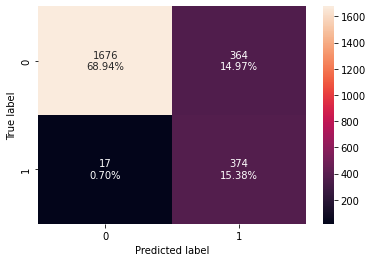

In [79]:
# Calculating different metrics on train set
xgboost_random_train = wrangle.model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
print(xgboost_random_train)


print("*************************************")
xgboost_random_validate = wrangle.model_performance_classification_sklearn(
    xgb_tuned2, X_validate, y_validate
)
print("Validate performance:")
print(xgboost_random_validate)

print("*************************************")


# creating confusion matrix
wrangle.confusion_matrix_sklearn(xgb_tuned2, X_validate, y_validate)

In [80]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [81]:
# defining model
model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.01,0.1,0.2,0.05],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gb_tuned2.best_params_,gb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2} with CV score=0.8726535759322644:


Training performance:
   Accuracy  Recall  Precision    F1
0     0.998   0.989      0.996 0.992
*************************************
Validate performance:
   Accuracy  Recall  Precision    F1
0     0.970   0.885      0.928 0.906
*************************************


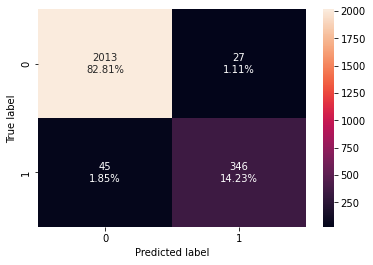

In [82]:
# Calculating different metrics on train set
gboost_random_train = wrangle.model_performance_classification_sklearn(
    gb_tuned2, X_train, y_train
)
print("Training performance:")
print(gboost_random_train)


print("*************************************")
gboost_random_validate = wrangle.model_performance_classification_sklearn(
    gb_tuned2, X_validate, y_validate
)
print("Validate performance:")
print(gboost_random_validate)

print("*************************************")


# creating confusion matrix
wrangle.confusion_matrix_sklearn(gb_tuned2, X_validate, y_validate)

### Key takeaway 
- After Hyperparameter tuning, the XGboos precion dropped about 30%
- The Graadient Boost performaced dropped as well 
- The best performing model is the Adaboost model after tuning

### Testing my best performing model on the Test set

In [83]:
# Best model Adaboost
best_model = adb_tuned2

In [84]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, best_model.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, best_model.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, best_model.predict(X_test)))

Recall on test set
0.8769230769230769

Precision on test set
0.9105431309904153

Accuracy on test set
0.9664363277393879


In [85]:
feature_names = X_train.columns
importances = adb_tuned2.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(adb_tuned2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Total_Trans_Amt                0.267
Total_Trans_Ct                 0.127
Total_Amt_Chng_Q4_Q1           0.103
Credit_Limit                   0.078
Total_Ct_Chng_Q4_Q1            0.071
Customer_Age                   0.064
Total_Revolving_Bal            0.058
Total_Relationship_Count       0.053
Months_Inactive_12_mon         0.048
Contacts_Count_12_mon          0.032
Months_on_book                 0.032
Avg_Utilization_Ratio          0.023
Marital_Status_Married         0.019
Dependent_count                0.009
Education_Level_Post-Graduate  0.007
Income_Category_$60K - $80K    0.006
Income_Category_$40K - $60K    0.004
Card_Category_Platinum         0.000
Card_Category_Gold             0.000
Income_Category_Less than $40K 0.000
Income_Category_$80K - $120K   0.000
Education_Level_Doctorate      0.000
Marital_Status_Single          0.000
Education_Level_Uneducated     0.000
Education_Level_High School    0.000
Education_Level_Graduate       0.000
G

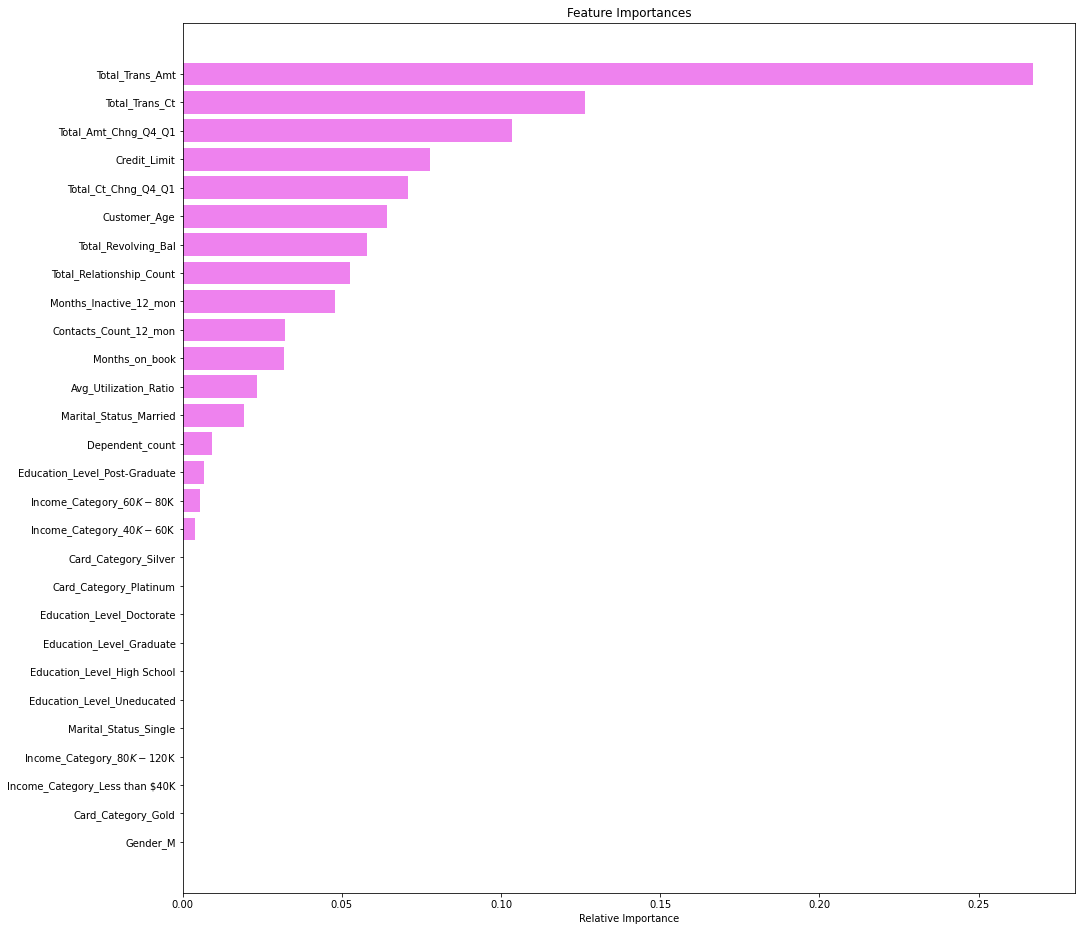

In [86]:
importances =adb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Pipelines for productionizing the model

In [143]:
# creating a list of numerical variables
numerical_features = ['Attrition_Flag','Dependent_count','Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal','Total_Relationship_Count',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Education_Level', 'Card_Category', 
                        'Marital_Status', 
                        'Gender','Income_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [144]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "ADB",
           AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# transforming and predicting on test data
model.predict(X_test)

## Conclusion & Recomeendations